# Pandas
-----
## 04. 데이터 그룹화 및 집계
### EDA (Exploratory Data Analysis)
   - 데이터를 이해하기 위한 탐색적 분석
   - 데이터의 특징과 내재하는 구조적 관계를 알아내는 과정
   - CDA (Confirmatory Data Analysis)와 대비되는 방법론
### 데이터그룹화
   - 데이터를 특정 기준에 따라 논리적으로 나누는 작업
   - 특정 열의 값이 동일한 행들을 하나의 그룹으로 묶음
   - groupby() 메서드를 사용하여 그룹화 수행
   - 그룹화 후 각 그룹에 대해 집계 함수를 적용하여 요약 통계 정보 계산 가능
   - 멀티 인덱스를 사용하여 여러 기준에 따라 복수 개의 열을 기준으로 그룹화 가능
   - 그룹화를 통해 원하는 데이터를 필터링하거나 변환할 수 있음

In [13]:
import pandas as pd

# gapminder.tsv 파일을 읽어서 데이터프레임으로 변환
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df

# 불러온 데이터프레임의 앞쪽 데이터를 확인
# df.head()
# df.head(10)
df.head(n=10)

# 불러온 데이터프레임의 뒤쪽 데이터를 확인
df.tail()

# 데이터프레임의 형태 확인
df.shape

# 데이터프레임에 포함된 컬럼 이름 확인
df.columns

# 각 컬럼의 자료형 확인
df.dtypes

# 데이터프레임의 전반적 정보 확인
df.info()

# 데이터프레임의 기술 통계 정보 확인
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [0]:
# year 열을 기준으로 데이터 그룹화, 연도별 groupby 객체 생성
grouped_year_df = df.groupby('year')
# grouped_year_df.head()
# type(grouped_year_df)
# 그룹화한 데이터프레임의 기술 통계 정보 확인
# df.describe()
grouped_year_df.describe()

# 그룹화한 데이터프레임에서 lifeExp 열만 추출하여 평균값 계산
grouped_year_df['lifeExp'].mean()

# year로 그룹화한 데이터프레임에서 lifeExp만 추출하여 평균값 계산
life_exp_df = df.groupby('year')['lifeExp'].mean()
life_exp_df

### 데이터프레임의 시각화
   - 데이터의 시각화는 데이터를 이해하는 데 매우 중요한 단계
   - 데이터프레임의 plot() 메서드를 사용하여 그래프 생성 가능
      - 다양한 종류의 그래프를 지원
        - 선 그래프, 막대 그래프, 히스토그램, 산점도 등
      - 내부적으로 Matplotlib를 사용하여 데이터를 그래프로 그려줌

#### plot 메서드의 주요 매개변수
- 기본 설정 및 데이터 지정
    - kind : 그래프 유형 지정 (예: 'line', 'bar', 'scatter' 등)
    - x : x축에 사용할 데이터 열 이름 또는 값
    - y : y축에 사용할 데이터 열 이름 또는 값
- 그래프 레이블 관련
    - title : 그래프 제목을 설정
    - xlabel : x축의 레이블을 설정
    - ylabel : y축의 레이블을 설정
    - xlim : x 축의 범위를 지정 (예: [xmin, xmax])
    - ylim : y 축의 범위를 지정 (예: [ymin, ymax])
    - grid : 축의 그리드를 표시할 지 여부를 지정 (기본값: False)
    - legend : 범례를 그릴 지 여부를 지정 (기본값: False)
    - color : 그래프의 색상을 지정 (기본값: 라인 플롯: None, 막대 그래프: 'b')
    - style : 라인 플롯 스타일을 지정 (예: 'o-', '--', 's-', 'k:')
    - subplots : 각 열을 개별 서브플롯으로 그릴지 여부를 지정합니다.

<Axes: title={'center': 'Life Expectancy Trends (By Year)'}, xlabel='year', ylabel='Life Expectancy'>

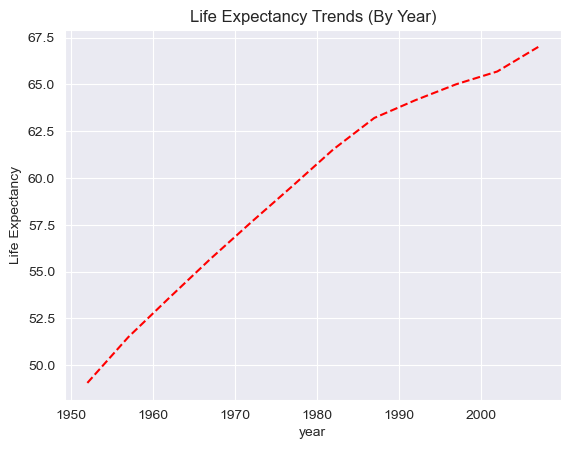

In [36]:
%matplotlib inline
# life_exp_df.plot()
life_exp_df.plot(kind='line',
                 x='year',
                 y='lifeExp',
                 title='Life Expectancy Trends (By Year)',
                 ylabel='Life Expectancy',
                 color='red',
                 style="--",)

#### [연습]
- gapminder 데이터셋을 이용, 연도별, 대륙별 그룹화 수행
- 그룹화된 데이터셋에서 gdpPercap 열만 추출하여 gdpPerCap의 평균값을 계산
- Plot으로 출력 

<Axes: title={'center': 'GDP per Capita Trends (By Year)'}, xlabel='Year'>

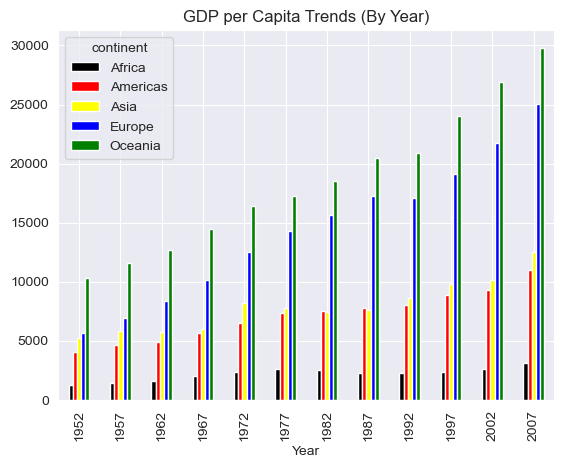

In [65]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('../data/gapminder.tsv', sep='\t')

grouped_df = df.groupby(["year", "continent"])
# grouped_df.describe()
gdp_summary = grouped_df['gdpPercap'].mean()
gdp_summary

gdp_summary.unstack().plot(kind='bar',
                 # figsize=(10, 10),
                 title='GDP per Capita Trends (By Year)',
                 # ylabel='GDP per Capita',
                 xlabel='Year',
                 color=['black', 'red', 'yellow', 'blue', 'green'],
                 legend=True)

### Pivot Table
#### 피봇 테이블 개요
- 데이터프레임의 데이터를 재구성하여 데이터에 대한 통계를 한눈에 파악할 수 있도록 정리한 표
- 데이터 분석과 정보 관리에서 중요한 도구
    - 엑셀 등 스프레드시트 프로그램에서 자주 사용
    - 대량의 데이터를 빠르게 정리하고 그룹화 할 수 있으며, 사용자의 필요에 따라 데이터를 분석하고 합계, 평균, 최대, 최소값 등을 계산할 수 있음
- 데이터를 효과적으로 정리하고 분석하는 데 있어 매우 강력한 도구로, 재무, 판매, 마케팅 등 다양한 분야에서 활용

#### 피봇 테이블의 주요 기능
1. 정렬과 그룹화: 특정 열 또는 행을 기준으로 데이터를 정렬하거나 그룹화하여 요약할 수 있음
2. 집계 함수 사용: SUM, AVERAGE, COUNT 등의 집계 함수를 사용하여 데이터를 요약할 수 있음
3. 데이터 필터링: 특정 조건을 적용하여 데이터를 필터링하고 분석할 수 있음
4. 드릴 다운 및 드릴 업: 데이터의 다른 레벨로 들어가 세부 정보를 확인하거나 요약된 정보로 돌아갈 수 있음

#### 피봇 테이블 작성 과정
1. 데이터 선택: 분석하고자 하는 데이터 범위를 선택합니다.
2. 피봇 테이블 생성: 대부분의 스프레드시트 프로그램에서는 특별한 메뉴 또는 버튼을 통해 피봇 테이블을 생성할 수 있습니다.
3. 행 및 열 선택: 특정 열을 행 또는 열에 배치하여 데이터를 그룹화합니다.
4. 값 및 집계 함수 선택: 특정 열의 값을 분석하고, 원하는 집계 함수를 선택합니다.
5. 필터 적용 (선택 사항): 원하는 조건에 맞게 데이터를 필터링할 수 있습니다.

### 피봇 테이블의 구성 요소
- 행 (또는 인덱스): 피봇 테이블의 왼쪽에 위치하며, 행에 있는 데이터를 기준으로 피봇 테이블의 데이터가 그룹화됨
- 열: 피봇 테이블의 위쪽에 위치하며, 열에 있는 데이터를 기준으로 피봇 테이블의 데이터가 그룹화됨
- 값: 집계 함수를 적용할 데이터
- 집계 함수: 데이터를 집계하는 데 사용되는 함수
- 필터 (선택사항): 원하는 조건에 맞게 데이터를 필터링할 수 있음

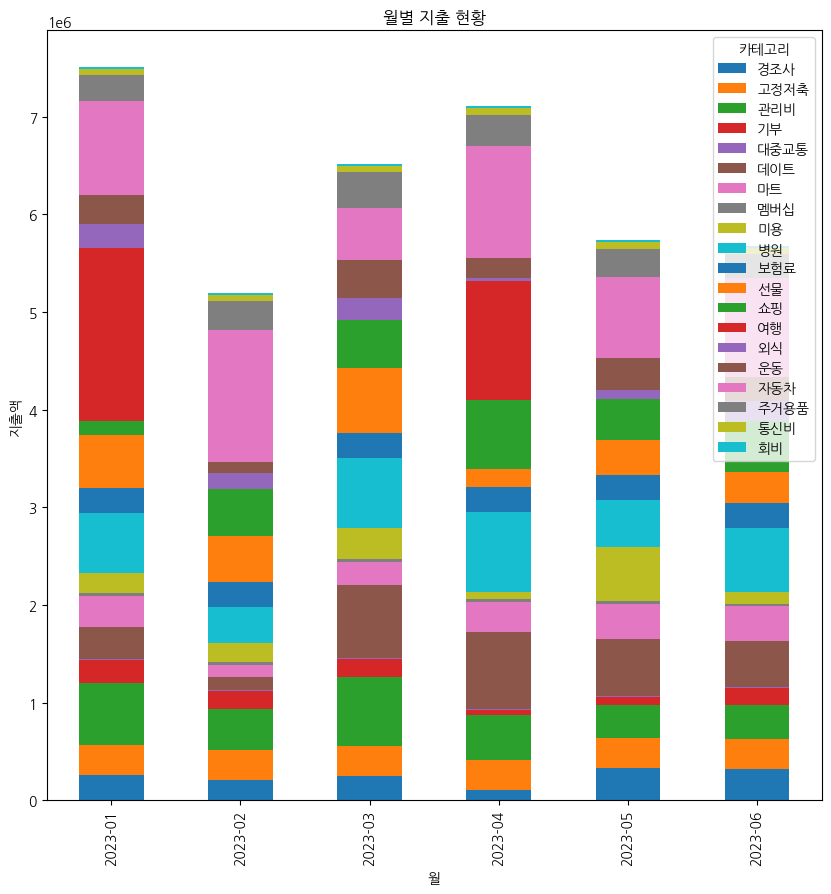

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.rcParams["font.family"] = 'NanumGothic'

df = pd.read_csv('../data/household_accounts.csv')
# df

# print(df["날짜"].dtype)
df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index("날짜", inplace=True)

# 피봇 테이블 생성
pivot_df = df.pivot_table(index='날짜', 
                          columns='카테고리', 
                          values='금액', 
                          aggfunc='sum',
                          fill_value=0)

# pivot_df

pivot_df_monthly = pivot_df.resample('M').sum()
pivot_df_monthly

pivot_df_monthly.index =pivot_df_monthly.index.to_period('M')
pivot_df_monthly

pivot_df_monthly.plot(kind='bar',
                      stacked=True,
                      figsize=(10, 10),
                      title='월별 지출 현황',
                      xlabel='월',
                      ylabel='지출액',
                      legend=True)

pivot_df_monthly['Total'] = pivot_df_monthly.sum(axis=1)
pivot_df_monthly.loc['Total'] = pivot_df_monthly.sum(axis=0)

pivot_df_monthly

# 데이터를 generated 폴더에 저장
if not os.path.exists('../generated'):
    os.mkdir('../generated')
    
pivot_df_monthly.to_csv('../generated/pivot_table.csv', encoding='utf-8')